In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# LOAD DATA
train_pro = pd.read_csv("train_proteins.csv")
train_pep= pd.read_csv("train_peptides.csv")
train_clin = pd.read_csv("train_clinical_data.csv")

In [3]:
# VISUALIZE DATA TO JOIN DATA
#-> .head() , .describe(), .info(), .shape()

In [4]:
print(train_pro.shape)
print(train_pep.shape)
print(train_clin.shape)

(232741, 5)
(981834, 6)
(2615, 8)


In [5]:
# different amount of columns, thus need to find similarities and differences bfr making a MERGE
print(train_pro.head(3000))
print(train_pep.head())
print(train_clin.head())

     visit_id  visit_month  patient_id UniProt         NPX
0        55_0            0          55  O00391    11254.30
1        55_0            0          55  O00533   732430.00
2        55_0            0          55  O00584    39585.80
3        55_0            0          55  O14498    41526.90
4        55_0            0          55  O14773    31238.00
...       ...          ...         ...     ...         ...
2995   7051_0            0        7051  P01877   264629.00
2996   7051_0            0        7051  P02452     6669.77
2997   7051_0            0        7051  P02647  8695510.00
2998   7051_0            0        7051  P02649  3950710.00
2999   7051_0            0        7051  P02652   628789.00

[3000 rows x 5 columns]
  visit_id  visit_month  patient_id UniProt  \
0     55_0            0          55  O00391   
1     55_0            0          55  O00533   
2     55_0            0          55  O00533   
3     55_0            0          55  O00533   
4     55_0            0         

In [6]:
#All have: Visit ID, visit MONTH, Patient ID, 
#BUT NOT : UNI PROT, NPX, PEPTIDE, PEPTIDE ABUNDANCE, UPDRS1-4, ON MEDICATION
#WANT: Visit ID, NPX, PEPTIDE ABUNDANCE,UPDRS1-4

In [7]:
#Clean Data To Merge Data
# Drop Month ID since 0 value and does not contribute to data processing

pro_Cond1= train_pro.drop("visit_month", axis=1 )
pep_Cond1= train_pep.drop("visit_month", axis=1 )

pro_Cond1.head()


,visit_id,patient_id,UniProt,NPX
0,55_0,55,O00391,11254.3
1,55_0,55,O00533,732430.0
2,55_0,55,O00584,39585.8
3,55_0,55,O14498,41526.9
4,55_0,55,O14773,31238.0


In [8]:
pep_Cond1.head()

,visit_id,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,55,O00533,SMEQNGPGLEYR,30838.7


In [9]:
#MERGE(JOIN)DATA Part 1
Pro_pep_cond=pro_Cond1.merge(pep_Cond1, on =["visit_id", "UniProt"])
Pro_pep_cond.head()

,visit_id,patient_id_x,UniProt,NPX,patient_id_y,Peptide,PeptideAbundance
0,55_0,55,O00391,11254.3,55,NEQEQPLGQWHLS,11254.3
1,55_0,55,O00533,732430.0,55,GNPEPTFSWTK,102060.0
2,55_0,55,O00533,732430.0,55,IEIPSSVQQVPTIIK,174185.0
3,55_0,55,O00533,732430.0,55,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,55,O00533,732430.0,55,SMEQNGPGLEYR,30838.7


In [10]:
#MERGE(JOIN)DATA Part 2
Pro_pep_clin= Pro_pep_cond.merge(train_clin, on =["visit_id"])
Pro_pep_clin.head()

,visit_id,patient_id_x,UniProt,NPX,patient_id_y,Peptide,PeptideAbundance,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,O00391,11254.3,55,NEQEQPLGQWHLS,11254.3,55,0,10.0,6.0,15.0,NaN,NaN
1,55_0,55,O00533,732430.0,55,GNPEPTFSWTK,102060.0,55,0,10.0,6.0,15.0,NaN,NaN
2,55_0,55,O00533,732430.0,55,IEIPSSVQQVPTIIK,174185.0,55,0,10.0,6.0,15.0,NaN,NaN
3,55_0,55,O00533,732430.0,55,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,55,0,10.0,6.0,15.0,NaN,NaN
4,55_0,55,O00533,732430.0,55,SMEQNGPGLEYR,30838.7,55,0,10.0,6.0,15.0,NaN,NaN


In [11]:
Pro_pep_clin.head(1000)

,visit_id,patient_id_x,UniProt,NPX,patient_id_y,Peptide,PeptideAbundance,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,O00391,11254.3,55,NEQEQPLGQWHLS,11254.300,55,0,10.0,6.0,15.0,NaN,NaN
1,55_0,55,O00533,732430.0,55,GNPEPTFSWTK,102060.000,55,0,10.0,6.0,15.0,NaN,NaN
2,55_0,55,O00533,732430.0,55,IEIPSSVQQVPTIIK,174185.000,55,0,10.0,6.0,15.0,NaN,NaN
3,55_0,55,O00533,732430.0,55,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.900,55,0,10.0,6.0,15.0,NaN,NaN
4,55_0,55,O00533,732430.0,55,SMEQNGPGLEYR,30838.700,55,0,10.0,6.0,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1517_0,1517,P00747,267277.0,1517,KLYDYC(UniMod_4)DVPQC(UniMod_4)AAPSFDC(UniMod_...,63039.100,1517,0,11.0,6.0,25.0,5.0,On
996,1517_0,1517,P00747,267277.0,1517,NPDGDVGGPWC(UniMod_4)YTTNPR,23899.600,1517,0,11.0,6.0,25.0,5.0,On
997,1517_0,1517,P00747,267277.0,1517,TPENYPNAGLTMNYC(UniMod_4)R,16662.100,1517,0,11.0,6.0,25.0,5.0,On
998,1517_0,1517,P00747,267277.0,1517,WSSTSPHRPR,984.469,1517,0,11.0,6.0,25.0,5.0,On


In [12]:
# Clean Data :Too many repeated rows.
#First view data for patient id
Pro_pep_clin["patient_id_x"].unique()
Pro_pep_clin["patient_id_x"].shape

(941744,)

In [13]:
Pro_pep_clin["patient_id_y"].unique()
Pro_pep_clin["patient_id_y"].shape

(941744,)

In [14]:
#Patient Id data is all the same 
#2 columns can be dropped
Pro_pep_clin_clean1 = Pro_pep_clin.drop("patient_id_x", axis=1 )


In [15]:
Pro_pep_clin_clean1 = Pro_pep_clin_clean1.drop("patient_id_y", axis=1 )
Pro_pep_clin_clean1.head(100)

,visit_id,UniProt,NPX,Peptide,PeptideAbundance,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55,0,10.0,6.0,15.0,NaN,NaN
1,55_0,O00533,732430.0,GNPEPTFSWTK,102060.0,55,0,10.0,6.0,15.0,NaN,NaN
2,55_0,O00533,732430.0,IEIPSSVQQVPTIIK,174185.0,55,0,10.0,6.0,15.0,NaN,NaN
3,55_0,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,55,0,10.0,6.0,15.0,NaN,NaN
4,55_0,O00533,732430.0,SMEQNGPGLEYR,30838.7,55,0,10.0,6.0,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,55_0,P01009,14415900.0,FLENEDRR,46973.1,55,0,10.0,6.0,15.0,NaN,NaN
96,55_0,P01009,14415900.0,FNKPFVFLM(UniMod_35)IEQNTK,90349.0,55,0,10.0,6.0,15.0,NaN,NaN
97,55_0,P01009,14415900.0,GMFNIQHC(UniMod_4)K,150899.0,55,0,10.0,6.0,15.0,NaN,NaN
98,55_0,P01009,14415900.0,KLSSWVLLM(UniMod_35)K,68210.7,55,0,10.0,6.0,15.0,NaN,NaN


In [16]:
##################################### DATA DEFINITIONS #################################

In [17]:
  # Visit ID     is the ID code for the visit.
  # Visit_month  is the month of the visit, relative to the first visit by the patient.
  # Patient_id   is the specific ID code for the patient.
  # UniProt      is the UniProt ID code for the associated protein. Several peptides make a protein.
  # Peptide      is the sequence of amino acids included in the peptide.
  # NPX          is the normalized protein expression. The frequency of the protein's occurrence in the sample. 
  # updrs_[1-4]  is the patient's score for part N of the Unified Parkinson's Disease Rating Scale. Higher numbers indicate more severe symptoms. Each sub-section covers a distinct category of symptoms, such as mood and behavior for Part 1 and motor functions for Part 3.
  # upd23b_clinical_state_on_medication  Whether or not the patient was taking medication such as Levodopa during the UPDRS assessment. Expected to mainly affect the scores for Part 3 (motor function). These medications wear off fairly quickly (on the order of one day) so it's common for patients to take the motor function exam twice in a single month, both with and without medication.

In [18]:
#Column Names
Pro_pep_clin_clean1.columns

Index(['visit_id', 'UniProt', 'NPX', 'Peptide', 'PeptideAbundance',
       'patient_id', 'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
       'upd23b_clinical_state_on_medication'],
      dtype='object')

In [19]:
# Data Types(.dtypes)
Pro_pep_clin_clean1.dtypes

visit_id                                object
UniProt                                 object
NPX                                    float64
Peptide                                 object
PeptideAbundance                       float64
patient_id                               int64
visit_month                              int64
updrs_1                                float64
updrs_2                                float64
updrs_3                                float64
updrs_4                                float64
upd23b_clinical_state_on_medication     object
dtype: object

In [20]:
#Description of the Columns
Pro_pep_clin_clean1.describe()

,NPX,PeptideAbundance,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,9.417440e+05,9.417440e+05,941744.000000,941744.000000,941744.000000,941744.000000,932624.000000,495530.000000
mean,1.700905e+07,6.432814e+05,32682.203127,26.771747,6.506168,5.781905,17.205189,1.887924
std,6.319169e+07,3.378418e+06,18608.454453,22.889144,5.310697,5.920009,15.020913,3.047579
min,8.460820e+01,1.099850e+01,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.432950e+05,2.818738e+04,16574.000000,6.000000,2.000000,1.000000,2.000000,0.000000
50%,9.928180e+05,7.435900e+04,29313.000000,24.000000,5.000000,4.000000,16.000000,0.000000
75%,3.728860e+06,2.215240e+05,50611.000000,48.000000,9.000000,9.000000,28.000000,3.000000
max,6.138510e+08,1.787520e+08,65043.000000,108.000000,33.000000,29.000000,78.000000,20.000000


In [21]:
#Unique values and Counts
print(Pro_pep_clin_clean1["visit_id"].nunique(), "unique entries for visit_id","out of",Pro_pep_clin_clean1["visit_id"].count(),"entries" )
# many repeating Values can be condensed

print(Pro_pep_clin_clean1["UniProt"].nunique(), "unique entries for UniProt",Pro_pep_clin_clean1["UniProt"].count(),"entries" ) 
# many repeating Values can be condensed

print(Pro_pep_clin_clean1["NPX"].nunique(),"unique entries for NPX", "out of",Pro_pep_clin_clean1["NPX"].count(),"entries" )

print(Pro_pep_clin_clean1["Peptide"].nunique(),"unique entries for Peptide", "out of",Pro_pep_clin_clean1["Peptide"].count(),"entries" )

print(Pro_pep_clin_clean1["PeptideAbundance"].nunique(),"unique entries for PeptideAbundance", "out of",Pro_pep_clin_clean1["PeptideAbundance"].count(),"entries" )

print(Pro_pep_clin_clean1["patient_id"].nunique(),"unique entries for patient_id", "out of",Pro_pep_clin_clean1["patient_id"].count(),"entries" )
# might want to get rid of patient id and keep visit ID becauese there are more unique entries

print(Pro_pep_clin_clean1["visit_month"].nunique(),"unique entries for visit_month", "out of",Pro_pep_clin_clean1["visit_month"].count(),"entries" )

print(Pro_pep_clin_clean1["updrs_1"].nunique(),"unique entries for updrs_1", "out of",Pro_pep_clin_clean1["updrs_1"].count(),"entries" )

print(Pro_pep_clin_clean1["updrs_2"].nunique(),"unique entries for updrs_2", "out of",Pro_pep_clin_clean1["updrs_2"].count(),"entries" )

print(Pro_pep_clin_clean1["updrs_3"].nunique(),"unique entries for updrs_3", "out of",Pro_pep_clin_clean1["updrs_3"].count(),"entries" )
# There are less entries for this value

print(Pro_pep_clin_clean1["updrs_4"].nunique(),"unique entries for updrs_4", "out of",Pro_pep_clin_clean1["updrs_4"].count(),"entries" )
# there is about 1/3 less entries

print(Pro_pep_clin_clean1["upd23b_clinical_state_on_medication"].nunique(),"unique entries for upd23b_clinical_state_on_medication", "out of",Pro_pep_clin_clean1["upd23b_clinical_state_on_medication"].count(),"entries" )
# there is about 1/3 less entries


1068 unique entries for visit_id out of 941744 entries
227 unique entries for UniProt 941744 entries
210353 unique entries for NPX out of 941744 entries
968 unique entries for Peptide out of 941744 entries
715930 unique entries for PeptideAbundance out of 941744 entries
248 unique entries for patient_id out of 941744 entries
15 unique entries for visit_month out of 941744 entries
30 unique entries for updrs_1 out of 941744 entries
29 unique entries for updrs_2 out of 941744 entries
64 unique entries for updrs_3 out of 932624 entries
17 unique entries for updrs_4 out of 495530 entries
2 unique entries for upd23b_clinical_state_on_medication out of 391725 entries


In [22]:
#Graphing: Percents of unique values
import matplotlib.pyplot as plt

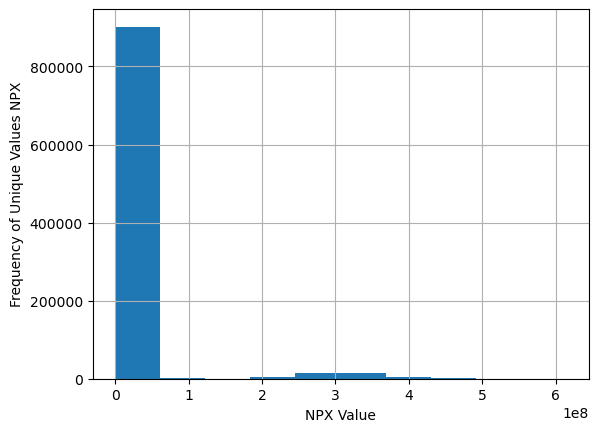

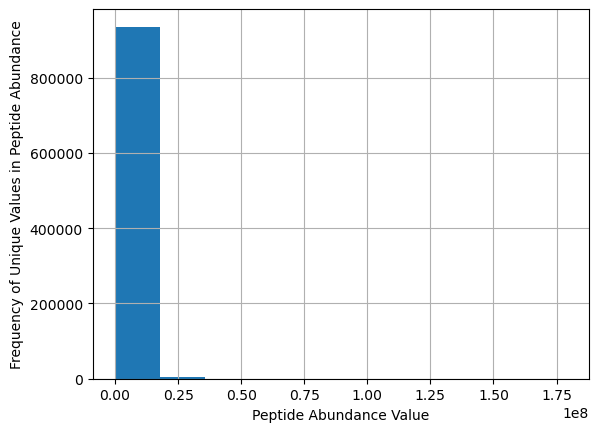

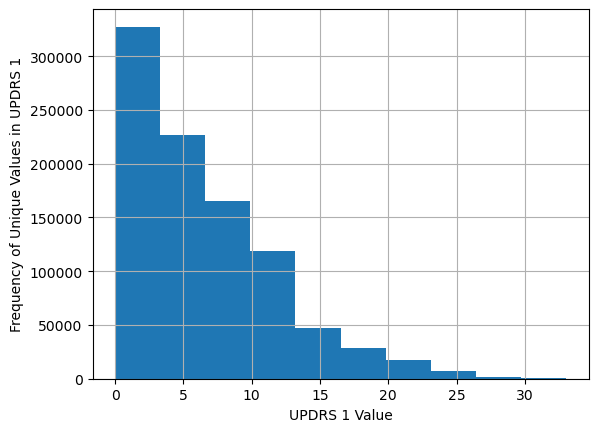

In [23]:
#percents of unique values of NPX, Peptide abundance, UPDRs
#Unique values of NPX using histogram


Pro_pep_clin_clean1["NPX"].hist()
plt.xlabel("NPX Value") # what type of number appears
plt.ylabel("Frequency of Unique Values NPX")# how many times the number appears
plt.show()


Pro_pep_clin_clean1["PeptideAbundance"].hist()
plt.xlabel("Peptide Abundance Value") # what type of number appears
plt.ylabel("Frequency of Unique Values in Peptide Abundance")# how many times the number appears
plt.show()
# Has some outliers in the 2-6 range

Pro_pep_clin_clean1["updrs_1"].hist()
plt.xlabel("UPDRS 1 Value") # what type of number appears
plt.ylabel("Frequency of Unique Values in UPDRS 1")# how many times the number appears
plt.show()




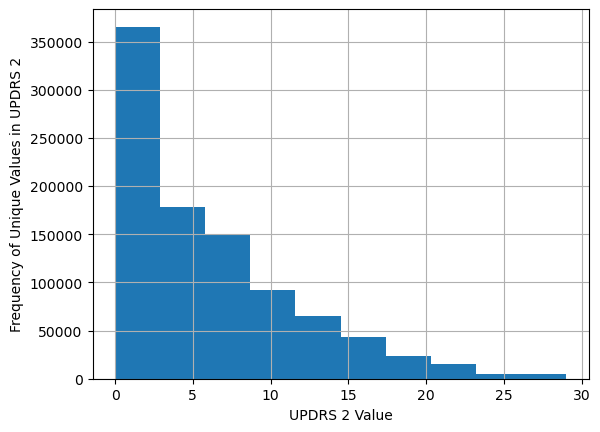

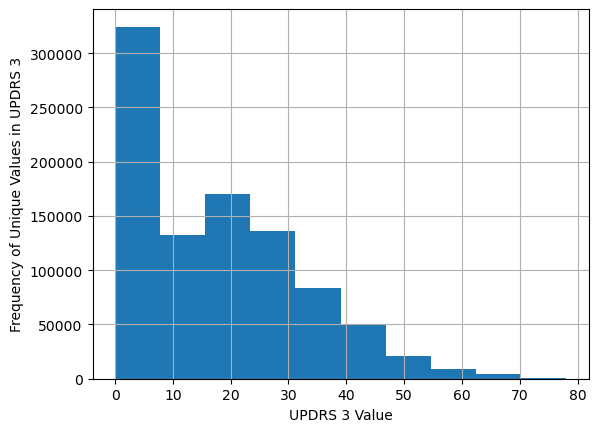

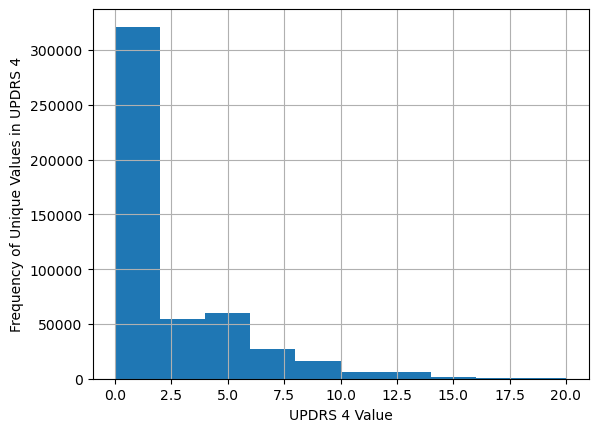

In [24]:
Pro_pep_clin_clean1["updrs_2"].hist()
plt.xlabel("UPDRS 2 Value") # what type of number appears
plt.ylabel("Frequency of Unique Values in UPDRS 2")# how many times the number appears
plt.show()

Pro_pep_clin_clean1["updrs_3"].hist()
plt.xlabel("UPDRS 3 Value") # what type of number appears
plt.ylabel("Frequency of Unique Values in UPDRS 3")# how many times the number appears
plt.show()

Pro_pep_clin_clean1["updrs_4"].dropna().hist()
plt.xlabel("UPDRS 4 Value") # what type of number appears
plt.ylabel("Frequency of Unique Values in UPDRS 4")# how many times the number appears
plt.show()



In [25]:
#Ranges of values
Pro_pep_clin.max(numeric_only=True)

patient_id_x            65043.0
NPX                 613851000.0
patient_id_y            65043.0
PeptideAbundance    178752000.0
patient_id              65043.0
visit_month               108.0
updrs_1                    33.0
updrs_2                    29.0
updrs_3                    78.0
updrs_4                    20.0
dtype: float64

In [26]:
#Ranges of values
Pro_pep_clin.min(numeric_only=True)

patient_id_x        55.0000
NPX                 84.6082
patient_id_y        55.0000
PeptideAbundance    10.9985
patient_id          55.0000
visit_month          0.0000
updrs_1              0.0000
updrs_2              0.0000
updrs_3              0.0000
updrs_4              0.0000
dtype: float64

In [27]:
################### DATA CLEANING #########################
#get rid of repeating data
# categorize data
# get rid of NA
# group by

In [28]:
Pro_pep_clin_clean1.head()

,visit_id,UniProt,NPX,Peptide,PeptideAbundance,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55,0,10.0,6.0,15.0,NaN,NaN
1,55_0,O00533,732430.0,GNPEPTFSWTK,102060.0,55,0,10.0,6.0,15.0,NaN,NaN
2,55_0,O00533,732430.0,IEIPSSVQQVPTIIK,174185.0,55,0,10.0,6.0,15.0,NaN,NaN
3,55_0,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,55,0,10.0,6.0,15.0,NaN,NaN
4,55_0,O00533,732430.0,SMEQNGPGLEYR,30838.7,55,0,10.0,6.0,15.0,NaN,NaN


In [29]:
# Drop Patient ID As it is also represented by visit ID
Pro_pep_clin_clean2 = Pro_pep_clin_clean1.drop("patient_id", axis=1 )
Pro_pep_clin_clean2.head()

,visit_id,UniProt,NPX,Peptide,PeptideAbundance,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,O00391,11254.3,NEQEQPLGQWHLS,11254.3,0,10.0,6.0,15.0,NaN,NaN
1,55_0,O00533,732430.0,GNPEPTFSWTK,102060.0,0,10.0,6.0,15.0,NaN,NaN
2,55_0,O00533,732430.0,IEIPSSVQQVPTIIK,174185.0,0,10.0,6.0,15.0,NaN,NaN
3,55_0,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,0,10.0,6.0,15.0,NaN,NaN
4,55_0,O00533,732430.0,SMEQNGPGLEYR,30838.7,0,10.0,6.0,15.0,NaN,NaN


In [30]:
#Categorize Data to get a better view
df = Pro_pep_clin_clean2

df= df.set_index(['visit_id','UniProt',"NPX"]).groupby(level=[0,1])
df.head(300)

Peptide  \
visit_id  UniProt NPX                                                
55_0      O00391  11254.3                            NEQEQPLGQWHLS   
          O00533  732430.0                             GNPEPTFSWTK   
                  732430.0                         IEIPSSVQQVPTIIK   
                  732430.0  KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK   
                  732430.0                            SMEQNGPGLEYR   
...                                                            ...   
58648_108 Q9UHG2  369437.0                         ILAGSADSEGVAAPR   
          Q9UKV8  105830.0                           SGNIPAGTTVDTK   
          Q9Y646  21257.6                              LALLVDTVGPR   
          Q9Y6R7  17953.1         AGC(UniMod_4)VAESTAVC(UniMod_4)R   
                  17953.1                           GATTSPGVYELSSR   

                            PeptideAbundance  visit_month  updrs_1  updrs_2  \
visit_id  UniProt NPX                                                         
55_0      O00391  11254.3           11254.30            0     10.0      6.0   
          O00533  732430.0         102060.00            0     10.0      6.0   
                  732430.0         174185.00            0     10.0      6.0   
                  732430.0          27278.90            0     10.0      6.0   
                  732430.0          30838.70            0     10.0      6.0   
...                                      ...          ...      ...      ...   
58648_108 Q9UHG2  369437.0         202820.00          108      6.0      0.0   
          Q9UKV8  105830.0         105830.00          108      6.0      0.0   
          Q9Y646  21257.6           21257.60          108      6.0      0.0   
          Q9Y6R7  17953.1            5127.26          108      6.0      0.0   
                  17953.1           12825.90          108      6.0      0.0   

                            updrs_3  updrs_4  \
visit_id  UniProt NPX                          
55_0      O00391  11254.3      15.0      NaN   
          O00533  732430.0     15.0      NaN   
                  732430.0     15.0      NaN   
                  732430.0     15.0      NaN   
                  732430.0     15.0      NaN   
...                             ...      ...   
58648_108 Q9UHG2  369437.0      0.0      NaN   
          Q9UKV8  105830.0      0.0      NaN   
          Q9Y646  21257.6       0.0      NaN   
          Q9Y6R7  17953.1       0.0      NaN   
                  17953.1       0.0      NaN   

                           upd23b_clinical_state_on_medication  
visit_id  UniProt NPX                                           
55_0      O00391  11254.3                                  NaN  
          O00533  732430.0                                 NaN  
                  732430.0                                 NaN  
                  732430.0                                 NaN  
                  732430.0                                 NaN  
...                                                        ...  
58648_108 Q9UHG2  369437.0                                 NaN  
          Q9UKV8  105830.0                                 NaN  
          Q9Y646  21257.6                                  NaN  
          Q9Y6R7  17953.1                                  NaN  
                  17953.1                                  NaN  

[941744 rows x 8 columns]

In [31]:
#Find missing NA values
NA_sum=Pro_pep_clin_clean2.isnull().sum()
percent= NA_sum/941744
missing = pd.concat([Pro_pep_clin_clean2.isnull().sum(), 100 * percent], axis=1)

missing.columns=["Count", "%"]
missing.sort_values(by= ["Count", "%"], ascending = False)


,Count,%
upd23b_clinical_state_on_medication,550019,58.404301
updrs_4,446214,47.381666
updrs_3,9120,0.968416
visit_id,0,0.000000
UniProt,0,0.000000
NPX,0,0.000000
Peptide,0,0.000000
PeptideAbundance,0,0.000000
visit_month,0,0.000000
updrs_1,0,0.000000


In [32]:
# conclusion: UPDR 3-4 and medication has many missing values
  # options: drop columns or to find the mean value

In [33]:
#Remove NA values or replace with mean depending if >50%
#remove medication state
# Drop Patient ID
Pro_pep_clin_clean3 = Pro_pep_clin_clean2.drop("upd23b_clinical_state_on_medication", axis=1 )
Pro_pep_clin_clean3.head()


,visit_id,UniProt,NPX,Peptide,PeptideAbundance,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
0,55_0,O00391,11254.3,NEQEQPLGQWHLS,11254.3,0,10.0,6.0,15.0,NaN
1,55_0,O00533,732430.0,GNPEPTFSWTK,102060.0,0,10.0,6.0,15.0,NaN
2,55_0,O00533,732430.0,IEIPSSVQQVPTIIK,174185.0,0,10.0,6.0,15.0,NaN
3,55_0,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,0,10.0,6.0,15.0,NaN
4,55_0,O00533,732430.0,SMEQNGPGLEYR,30838.7,0,10.0,6.0,15.0,NaN


In [43]:
# FIND DUPLICATES
duplicate= Pro_pep_clin_clean3.duplicated(subset=None, keep= False)
print(duplicate)

duplicate_count= Pro_pep_clin_clean3.duplicated(subset=None, keep= False).nunique()
print(duplicate_count)
  #ONLY ONE UNIQUE VALUE of FALSE  !!

0         False
1         False
2         False
3         False
4         False
          ...  
941739    False
941740    False
941741    False
941742    False
941743    False
Length: 941744, dtype: bool
1


In [38]:
# replace UPDRS 3,4 NA values with mean

meanU3= Pro_pep_clin_clean3["updrs_3"].mean()
print(meanU3)

meanU4=Pro_pep_clin_clean3["updrs_4"].mean()
print(meanU4)




17.205188800631337
1.8879240409258773


In [431]:
Pro_pep_clin_clean3["updrs_3"] = Pro_pep_clin_clean3["updrs_3"].fillna( Pro_pep_clin_clean3["updrs_3"].mean())

Pro_pep_clin_clean3["updrs_4"] = Pro_pep_clin_clean3["updrs_4"].fillna( Pro_pep_clin_clean3["updrs_4"].mean())


In [432]:
 Pro_pep_clin_clean3.head()

,visit_id,UniProt,NPX,Peptide,PeptideAbundance,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
0,55_0,O00391,11254.3,NEQEQPLGQWHLS,11254.3,0,10.0,6.0,15.0,1.887924
1,55_0,O00533,732430.0,GNPEPTFSWTK,102060.0,0,10.0,6.0,15.0,1.887924
2,55_0,O00533,732430.0,IEIPSSVQQVPTIIK,174185.0,0,10.0,6.0,15.0,1.887924
3,55_0,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,0,10.0,6.0,15.0,1.887924
4,55_0,O00533,732430.0,SMEQNGPGLEYR,30838.7,0,10.0,6.0,15.0,1.887924


In [435]:
# CREATE FINAL ORGANIZED VIEW
df = Pro_pep_clin_clean3

df= df.set_index(['visit_id','UniProt',"NPX"]).groupby(level=[0,1])
df.head(3000)

Peptide  \
visit_id  UniProt NPX                                                
55_0      O00391  11254.3                            NEQEQPLGQWHLS   
          O00533  732430.0                             GNPEPTFSWTK   
                  732430.0                         IEIPSSVQQVPTIIK   
                  732430.0  KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK   
                  732430.0                            SMEQNGPGLEYR   
...                                                            ...   
58648_108 Q9UHG2  369437.0                         ILAGSADSEGVAAPR   
          Q9UKV8  105830.0                           SGNIPAGTTVDTK   
          Q9Y646  21257.6                              LALLVDTVGPR   
          Q9Y6R7  17953.1         AGC(UniMod_4)VAESTAVC(UniMod_4)R   
                  17953.1                           GATTSPGVYELSSR   

                            PeptideAbundance  visit_month  updrs_1  updrs_2  \
visit_id  UniProt NPX                                                         
55_0      O00391  11254.3           11254.30            0     10.0      6.0   
          O00533  732430.0         102060.00            0     10.0      6.0   
                  732430.0         174185.00            0     10.0      6.0   
                  732430.0          27278.90            0     10.0      6.0   
                  732430.0          30838.70            0     10.0      6.0   
...                                      ...          ...      ...      ...   
58648_108 Q9UHG2  369437.0         202820.00          108      6.0      0.0   
          Q9UKV8  105830.0         105830.00          108      6.0      0.0   
          Q9Y646  21257.6           21257.60          108      6.0      0.0   
          Q9Y6R7  17953.1            5127.26          108      6.0      0.0   
                  17953.1           12825.90          108      6.0      0.0   

                            updrs_3   updrs_4  
visit_id  UniProt NPX                          
55_0      O00391  11254.3      15.0  1.887924  
          O00533  732430.0     15.0  1.887924  
                  732430.0     15.0  1.887924  
                  732430.0     15.0  1.887924  
                  732430.0     15.0  1.887924  
...                             ...       ...  
58648_108 Q9UHG2  369437.0      0.0  1.887924  
          Q9UKV8  105830.0      0.0  1.887924  
          Q9Y646  21257.6       0.0  1.887924  
          Q9Y6R7  17953.1       0.0  1.887924  
                  17953.1       0.0  1.887924  

[941744 rows x 7 columns]